In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import scipy.stats as stats 
from sklearn.preprocessing import LabelEncoder 
import copy 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
sns.set()

In [3]:
insurance_df = pd.read_csv('../input/insurance/insurance.csv')

In [4]:
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Basic EDA

1.Find the shape of the data,data type of individual columns

2.Check the presence of missing values

3.Descriptive stats of numerical columns

4.Find the distribution of numerical columns and the asssociated skeweness and presence of outliers

5.Distribution of categorical columns

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


* Data looks legit as all the statistics seem reasonable
* Looking at the age column, data looks representative of the true age distribution of the adult population
* Very few people have more than 2 children. 75% of the people have 2 or less children¶
* The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

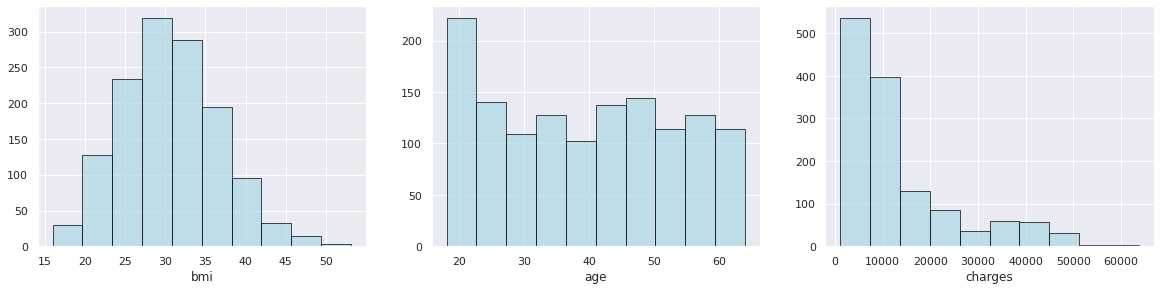

In [7]:
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')


plt.subplot(3,3,2)
plt.hist(insurance_df.age, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

* bmi looks quiet normally distributed
* Age seems be be distributed quiet uniformly¶
* As seen in the previous step, charges are highly skewed

In [8]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi), stats.skew(insurance_df.age), stats.skew(insurance_df.charges)]}, 
                       index = ['bmi', 'age', 'charges'])
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


* Skew of bmi is very less as seen in the previous step
* age is uniformly distributed and there's hardly any skew
* charges are highly skewed

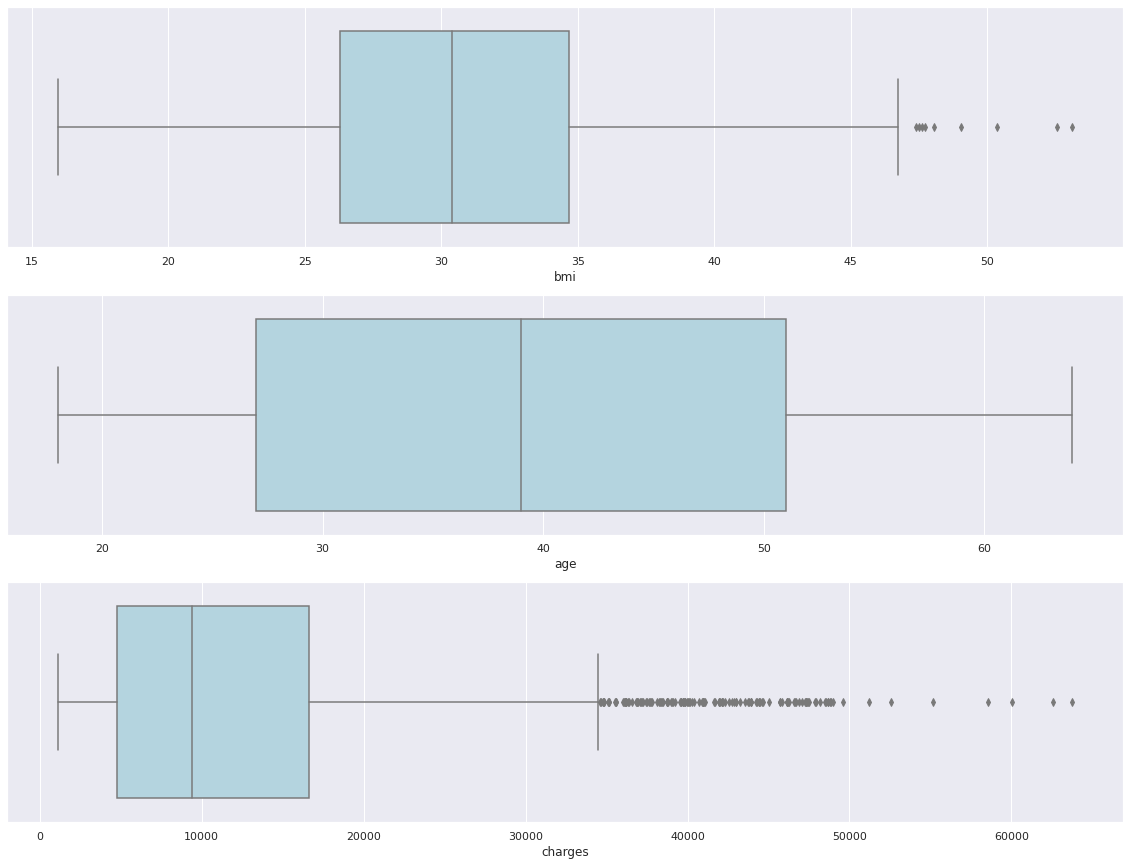

In [9]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.boxplot(x = insurance_df.bmi, color = 'lightblue')

plt.subplot(3,1,2)
sns.boxplot(x = insurance_df.age, color = 'lightblue')

plt.subplot(3,1,3)
sns.boxplot(x = insurance_df.charges, color = 'lightblue')

plt.show()

* bmi has a few extreme values
* charges as it is highly skewed, there are quiet a lot of extreme values

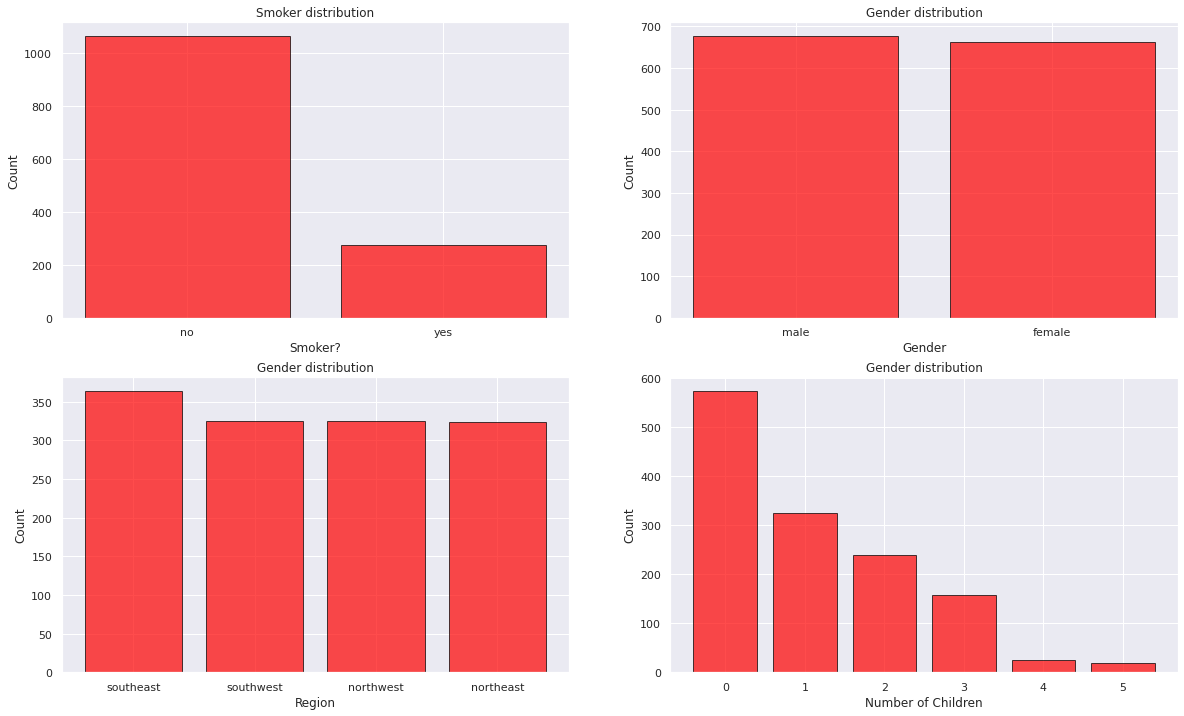

In [10]:
plt.figure(figsize = (20,25))

x = insurance_df.smoker.value_counts().index 
y = [insurance_df['smoker'].value_counts()[i] for i in x]

plt.subplot(4,2,1)
plt.bar(x, y, align = 'center', color = 'red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker distribution')

x1 = insurance_df.sex.value_counts().index
y1 = [insurance_df['sex'].value_counts()[j] for j in x1]

plt.subplot(4,2,2)
plt.bar(x1, y1, align = 'center', color = 'red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = insurance_df.region.value_counts().index
y2 = [insurance_df['region'].value_counts()[k] for k in x2]

plt.subplot(4,2,3)
plt.bar(x2, y2, align = 'center', color = 'red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Gender distribution')

x3 = insurance_df.children.value_counts().index
y3 = [insurance_df['children'].value_counts()[l] for l in x3]

plt.subplot(4,2,4)
plt.bar(x3, y3, align = 'center', color = 'red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Gender distribution')

plt.show()

* There are a lot more non-smokers than there are smokers in the data
* Instances are distributed evenly accross all regions
* Gender is also distributed evenly
* Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair

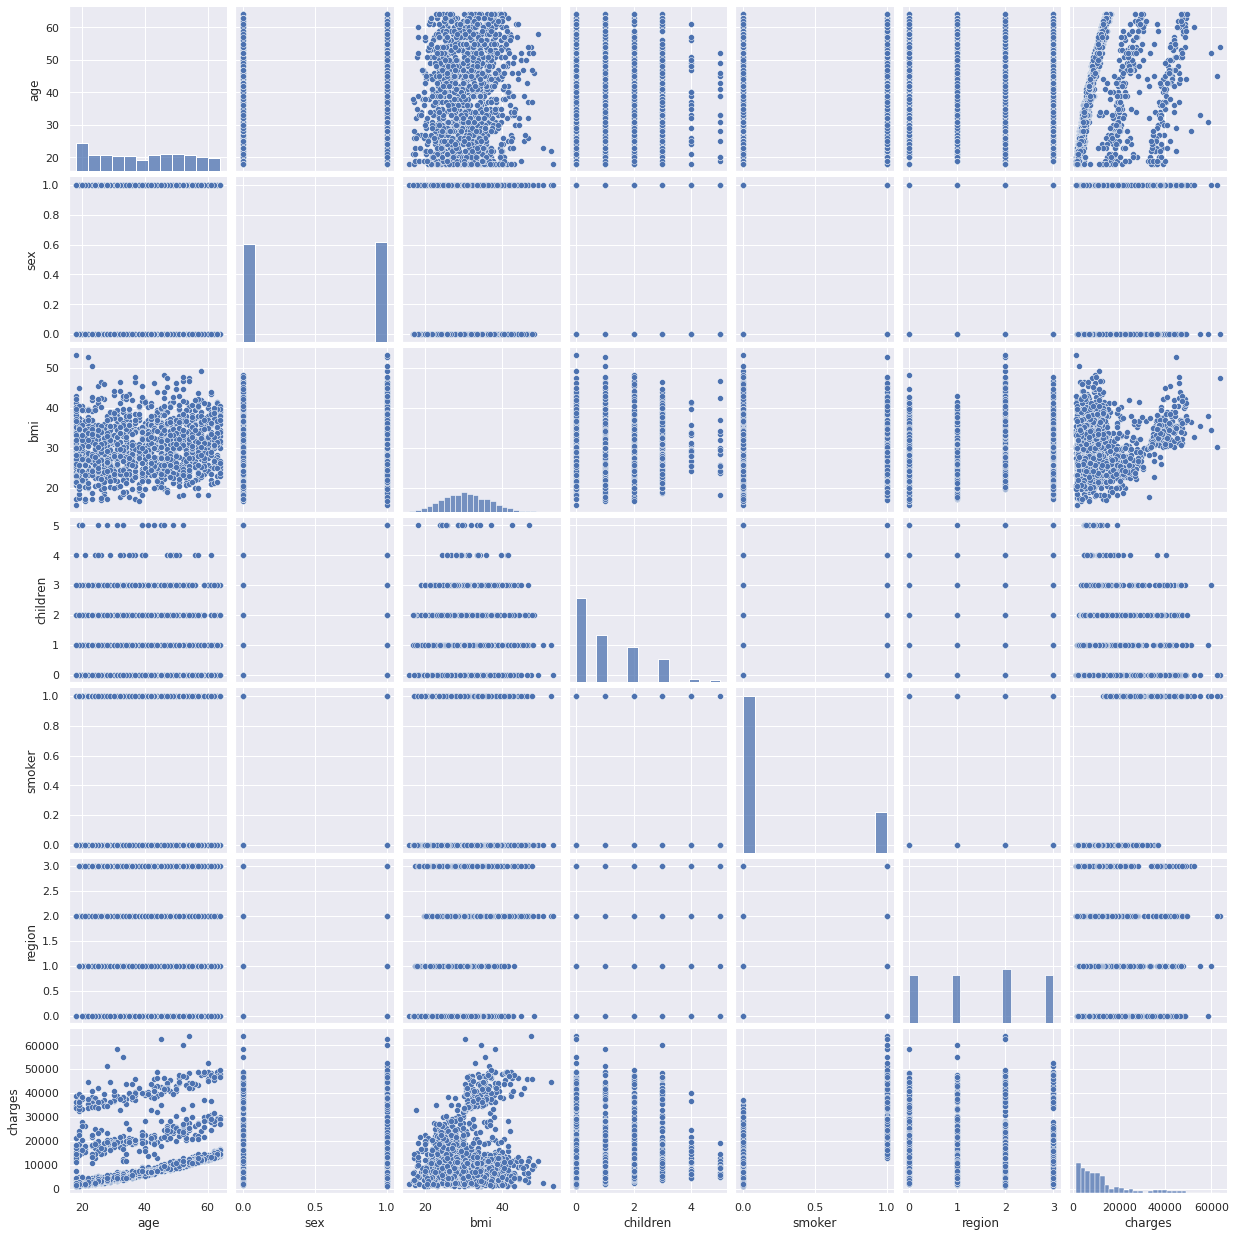

In [11]:
insurance_df_encoded = copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:, ['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:, ['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

sns.pairplot(insurance_df_encoded)
plt.show()

* The only obvious correlation of 'charges' is with 'smoker'
* Looks like smokers claimed more money than non-smokers
* There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

**DO CHARGES OF PEOPLE WHO SMOKE DIFFER SIGNIFICANTLY FROM THE PEOPLE WHO DON'T?**

In [12]:
insurance_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


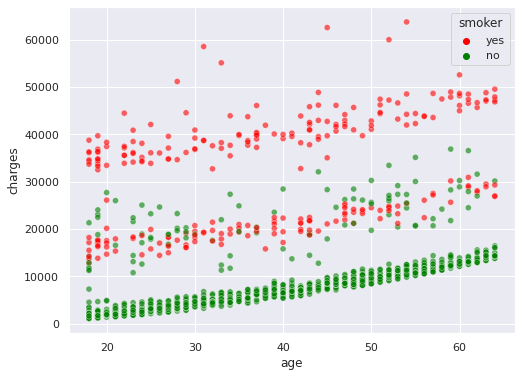

In [13]:
plt.figure(figsize = (8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue = insurance_df.smoker, palette = ['red', 'green'], alpha = 0.6)
plt.show()

In [14]:
Ho = "Charges of smoker and non-smoker are same"
Ha = "Charges of smoker and non-smoker are not same"

x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges)
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges)

t, p_value = stats.ttest_ind(x, y, axis = 0)

if p_value < 0.05 : 
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else: 
    print(f'{Ho} as the p_value ({p_value}) > 0.05')


Charges of smoker and non-smoker are not same as the p_value (8.271435842179102e-283) < 0.05


**DOES BMI OF MALES DIFFER SIGNIFICANTLY FROM THAT OF FEMALES?**

In [15]:
insurance_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


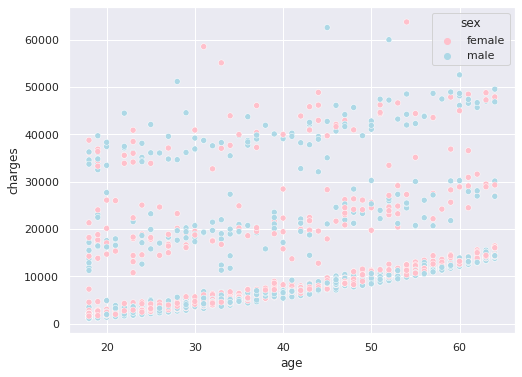

In [16]:
plt.figure(figsize = (8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue = insurance_df.sex, palette = ['pink', 'lightblue'])
plt.show()

* Visually, there is no apparent relation between gender and charges

In [17]:
Ho = "Gender has no effect on bmi"
Ha = "Gender has an effect on bmi"

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi)

t, p_value = stats.ttest_ind(x, y, axis = 0)

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else: 
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


**IS THE PROPORTION OF SMOKERS SIGNIFICANTLY DIFFERENT IN DIFFERENT GENDERS?**

In [18]:
Ho = "Gender has no effect on smoking habits"
Ha = "Gender has an effect on smoking habits"

crosstab = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else: 
    print(f'{Ho} as the p_value({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Proportion of smokers in males is significantly different from that of the females

In [19]:
Ho = "Region has no effect on smoking habits"
Ha = "Region has an effect on smoking habits"

crosstab = pd.crosstab(insurance_df['smoker'], insurance_df['region'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05: 
      print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else: 
    print(f'{Ho} as the p_value({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value(0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


**IS THE DISTRIBUTION OF BMI ACROSS WOMEN WITH NO CHILDREN, ONE CHILD AND TWO CHILDREN, THE SAME?**

In [20]:
Ho = "Number of children has no effect on bmi"
Ha = "Number of children has an effect on bmi"

female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_values = stats.f_oneway(zero, one, two)

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else: 
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Number of children has no effect on bmi as the p_value (0.062) > 0.05


In [21]:
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno 
import scipy.stats as stats 
import statsmodels.api as sm 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score, cross_val_predict 
from numpy import log, log1p 
from scipy.stats import boxcox
import pylab 
from sklearn.linear_model import LinearRegression 
#!pip install yellowbrick
from yellowbrick.regressor import residuals_plot, ResidualsPlot, RegressionScoreVisualizer 
from scipy.stats import shapiro, boxcox, yeojohnson 
from yellowbrick.regressor import prediction_error 
!pip install dython 
from dython import nominal 
from mlxtend.plotting import plot_linear_regression, plot_learning_curves
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline 

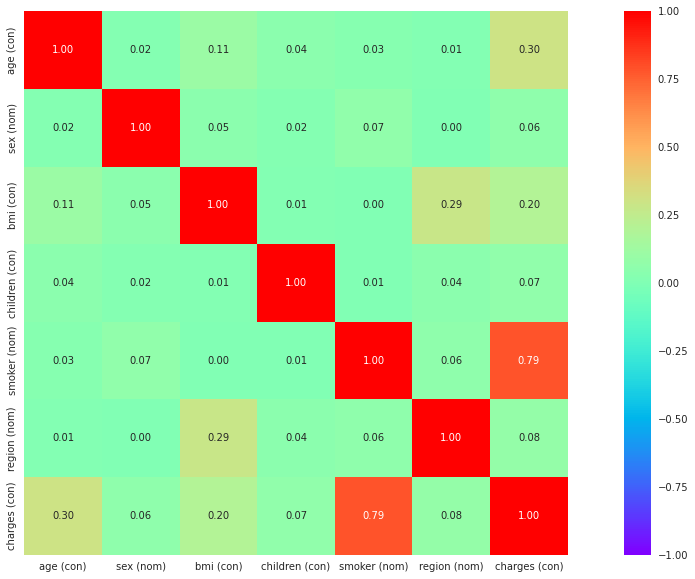

{'corr':                 age (con)  sex (nom)  bmi (con)  children (con)  smoker (nom)  \
 age (con)        1.000000   0.020856   0.109272        0.042469      0.025019   
 sex (nom)        0.020856   1.000000   0.046371        0.017163      0.069145   
 bmi (con)        0.109272   0.046371   1.000000        0.012759      0.003750   
 children (con)   0.042469   0.017163   0.012759        1.000000      0.007673   
 smoker (nom)     0.025019   0.069145   0.003750        0.007673      1.000000   
 region (nom)     0.013394   0.000000   0.285612        0.040137      0.056982   
 charges (con)    0.299008   0.057292   0.198341        0.067998      0.787251   
 
                 region (nom)  charges (con)  
 age (con)           0.013394       0.299008  
 sex (nom)           0.000000       0.057292  
 bmi (con)           0.285612       0.198341  
 children (con)      0.040137       0.067998  
 smoker (nom)        0.056982       0.787251  
 region (nom)        1.000000       0.081449  
 char

In [22]:
nominal.associations(insurance_df, figsize = (20,10), mark_columns = True, cmap = 'rainbow')

<AxesSubplot:>

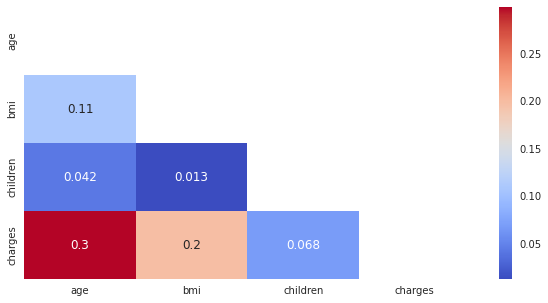

In [23]:
plt.rcParams.update({'font.size' : 12})
plt.figure(figsize = (10,5))
corr = insurance_df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr.abs(), annot = True, cmap = 'coolwarm', mask = mask)

<AxesSubplot:xlabel='charges', ylabel='Density'>

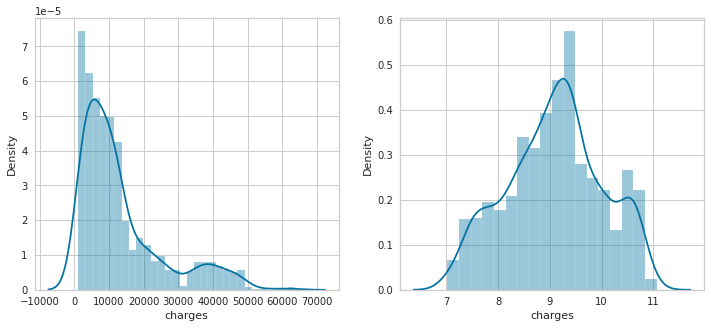

In [24]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(insurance_df.charges, color = "b")
plt.subplot(122)
sns.distplot(log(insurance_df.charges), color = "b")

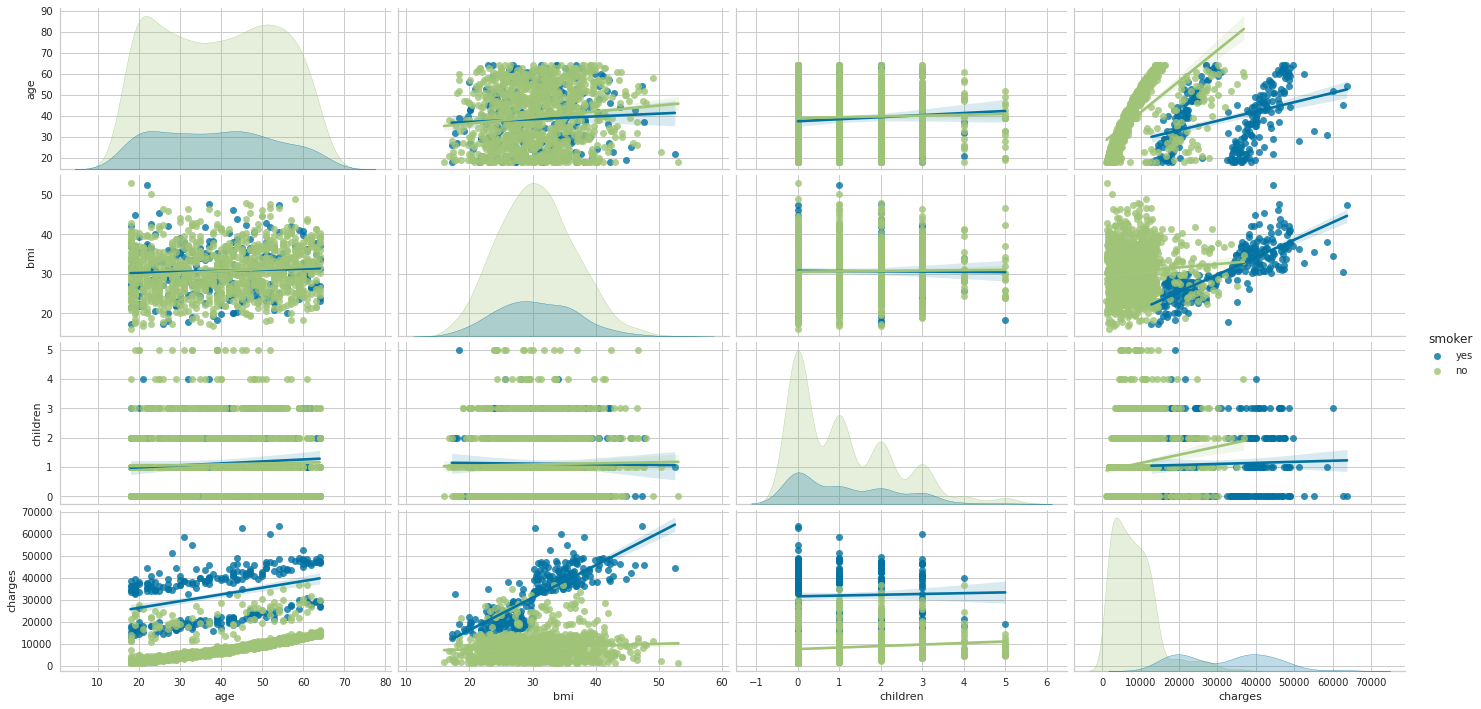

In [25]:
sns.pairplot(insurance_df, kind = "reg", hue = "smoker", aspect = 2)

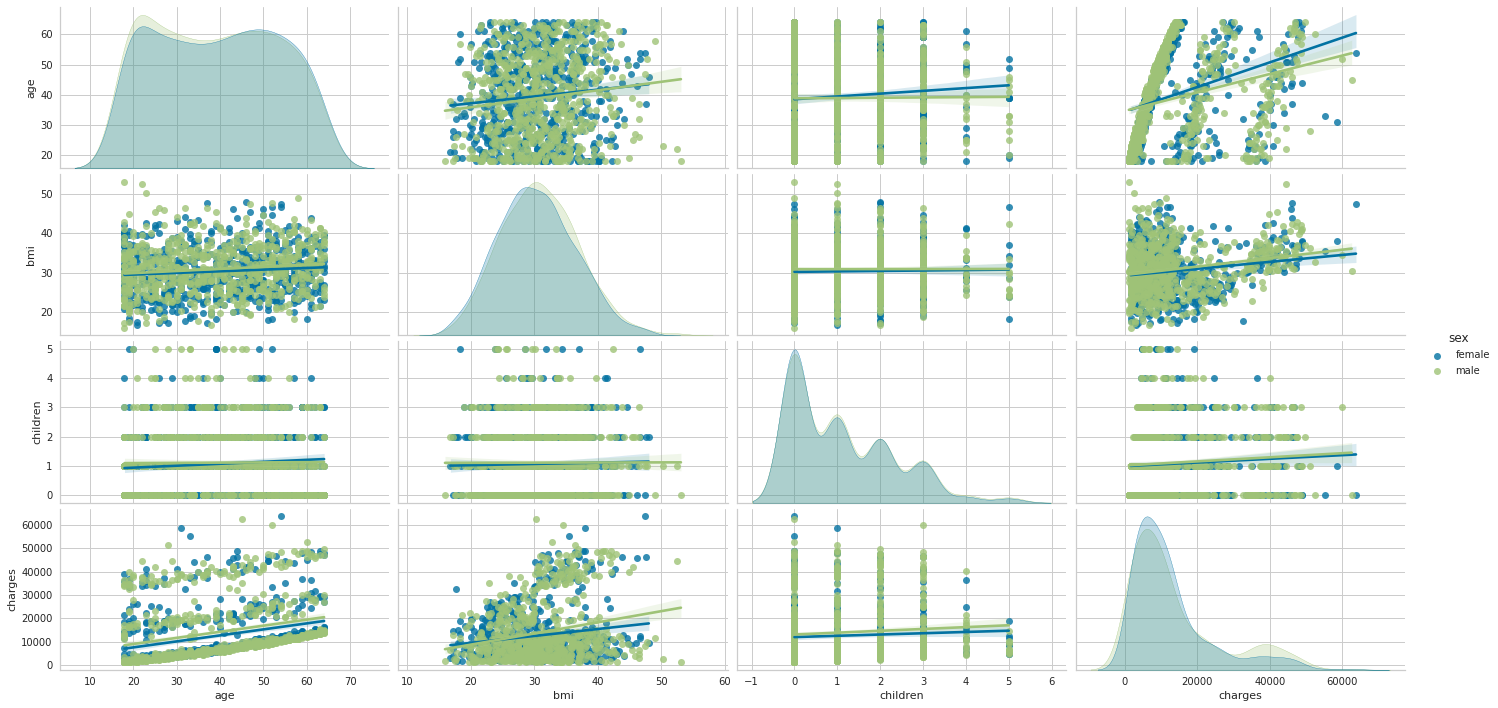

In [26]:
sns.pairplot(insurance_df, kind = "reg", hue = "sex", aspect =2)

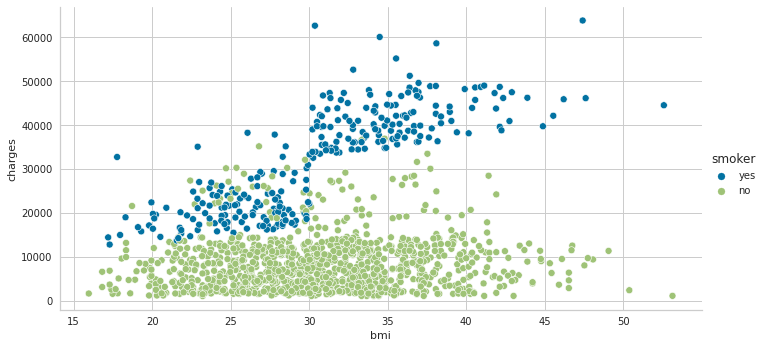

In [27]:
sns.relplot(x = "bmi", y = "charges", hue = "smoker", data = insurance_df, kind = "scatter", aspect = 2)

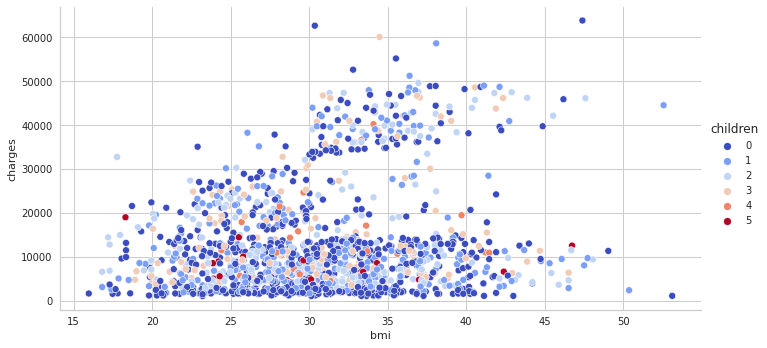

In [28]:
sns.relplot(x = "bmi", y = "charges", hue = "children", data = insurance_df, kind = "scatter", aspect = 2, palette = 'coolwarm')

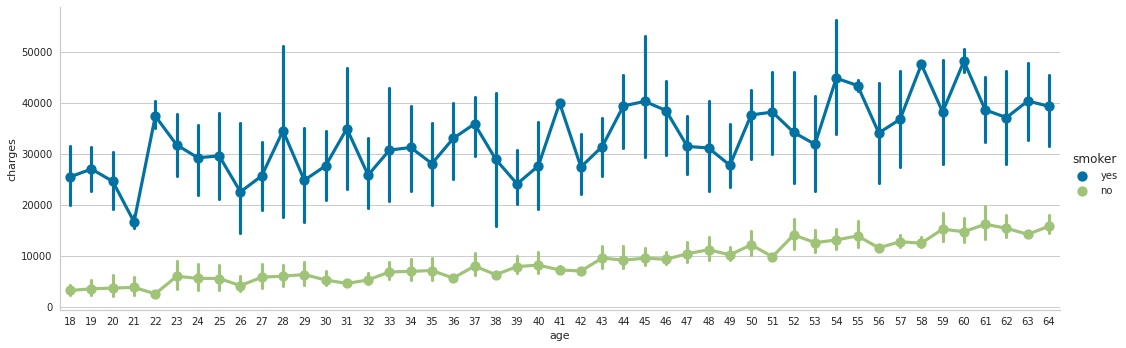

In [29]:
sns.catplot(x = "age", y = "charges", hue = "smoker", data = insurance_df, aspect = 3, kind = "point")

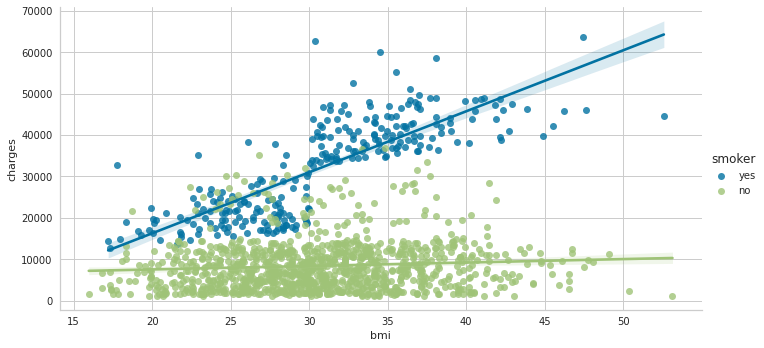

In [30]:
sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = insurance_df, aspect = 2)

<Figure size 864x360 with 0 Axes>

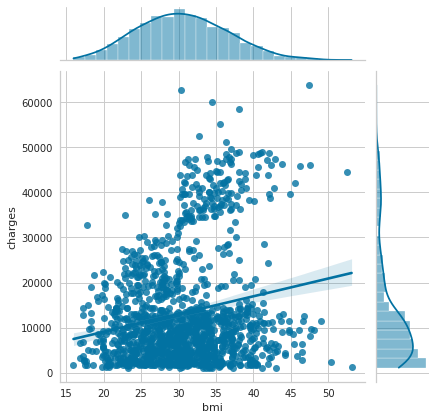

In [31]:
plt.figure(figsize = (12,5))
sns.jointplot(x = "bmi", y = "charges", data = insurance_df, kind = "reg")

<Figure size 864x360 with 0 Axes>

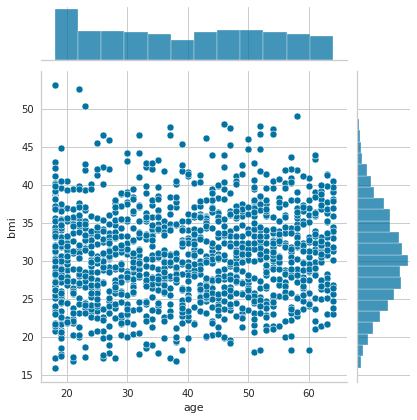

In [32]:
plt.figure(figsize = (12,5))
sns.jointplot(x = "age", y = "bmi", data = insurance_df)

<AxesSubplot:xlabel='age', ylabel='Density'>

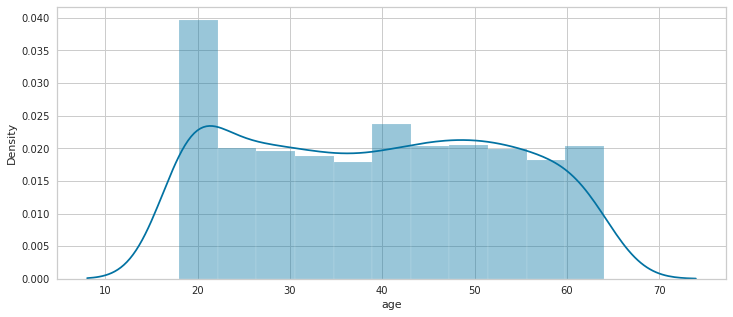

In [33]:
plt.figure(figsize = (12,5))
sns.distplot(insurance_df.age)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 60021.39897,
         62592.87309, 63770.42801])),
 (10952.462526491305, 13270.422265141258, 0.9028052656368237))

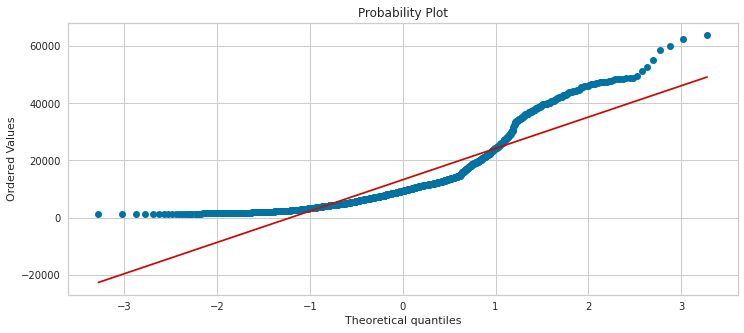

In [34]:
plt.figure(figsize = (12,5))
stats.probplot(insurance_df.charges, dist = "norm", plot = pylab)

<AxesSubplot:xlabel='smoker'>

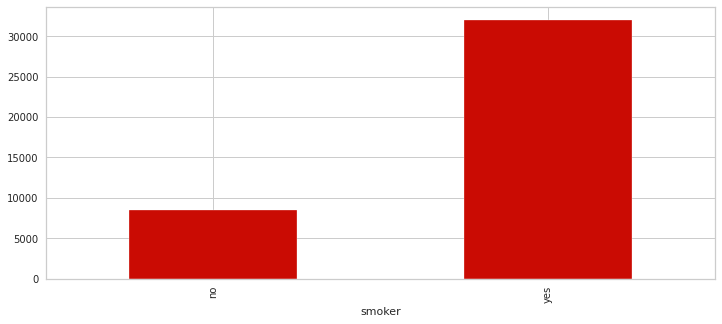

In [35]:
plt.figure(figsize = (12,5))
insurance_df.groupby("smoker")["charges"].mean().plot.bar(color = "r")

<AxesSubplot:xlabel='children'>

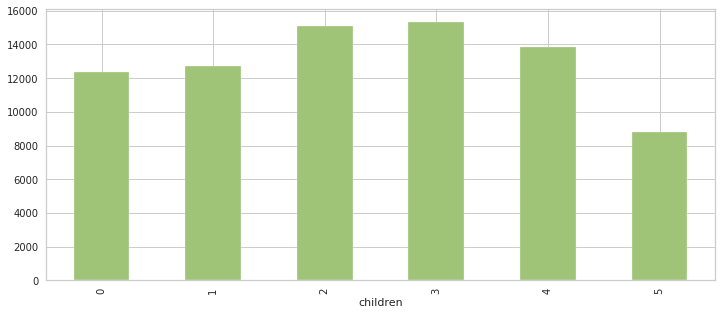

In [36]:
plt.figure(figsize = (12,5))
insurance_df.groupby("children")["charges"].mean().plot.bar(color = "g")

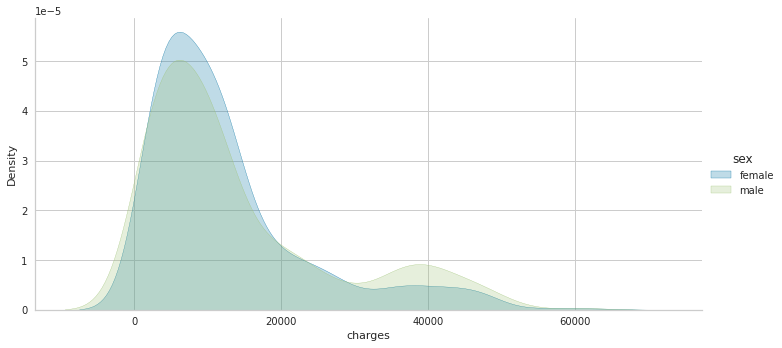

In [37]:
print(sns.FacetGrid(insurance_df, hue = "sex", height = 5, aspect =2).map(sns.kdeplot, "charges", shade = True).add_legend())

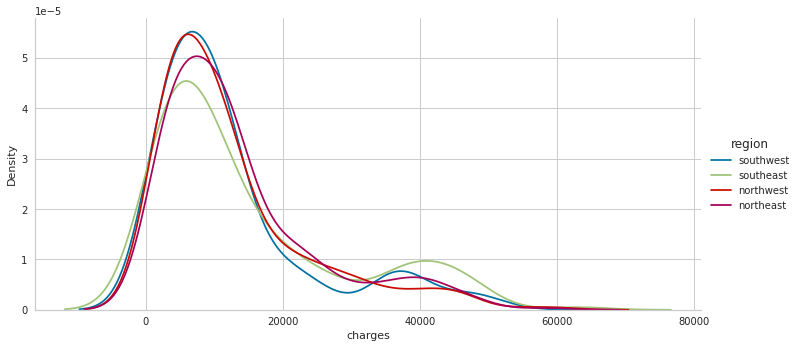

In [38]:
print(sns.FacetGrid(insurance_df, hue = "region", height = 5, aspect =2).map(sns.kdeplot, "charges", shade = False).add_legend())

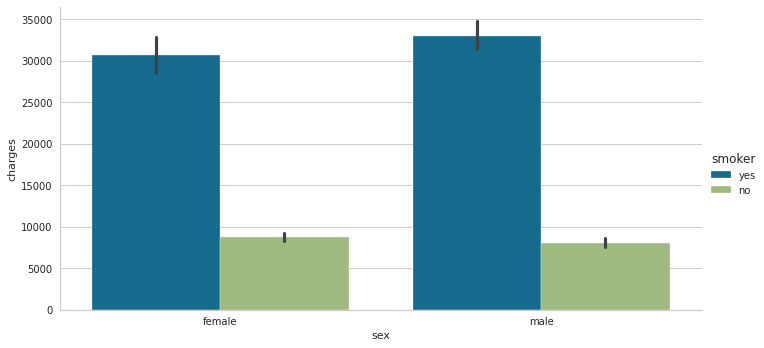

In [39]:
print(sns.catplot(x = "sex", y = "charges", hue = "smoker", data = insurance_df, kind = "bar", aspect = 2))

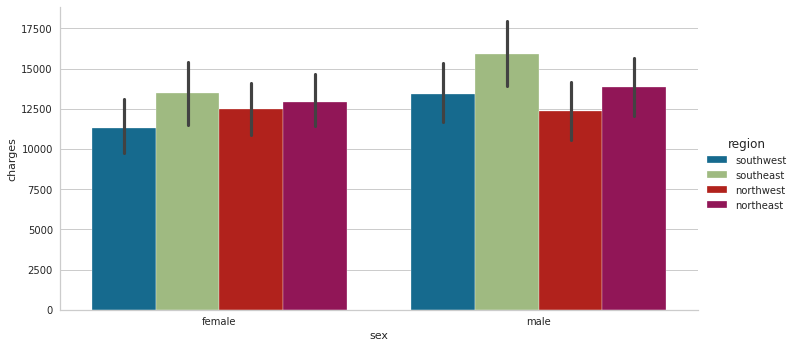

In [40]:
print(sns.catplot(x = "sex", y = "charges", hue = "region", data = insurance_df, kind = "bar", aspect = 2))

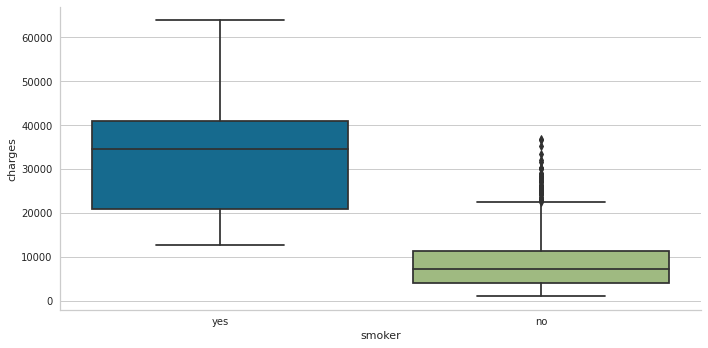

In [41]:
sns.catplot(x = "smoker", y = "charges", data = insurance_df, kind = "box", aspect = 2)

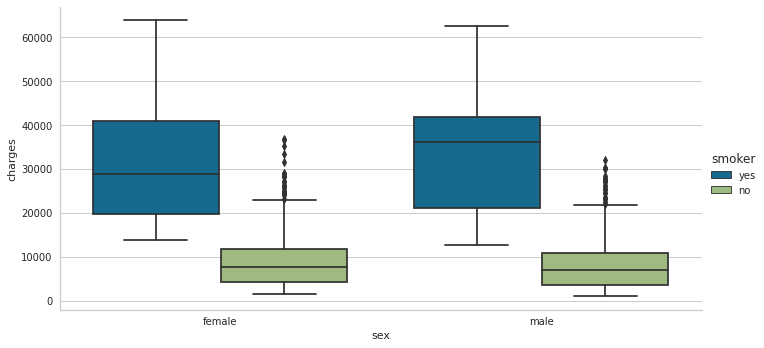

In [42]:
sns.catplot(x = "sex", y = "charges", hue = "smoker", data = insurance_df, kind = "box", aspect = 2)

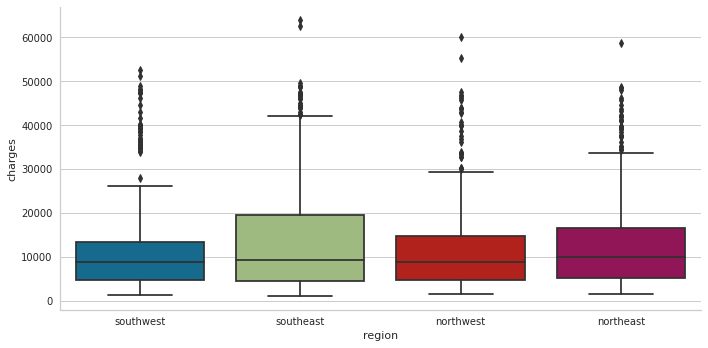

In [43]:
sns.catplot(x = "region", y = "charges", data = insurance_df, kind = "box", aspect = 2)

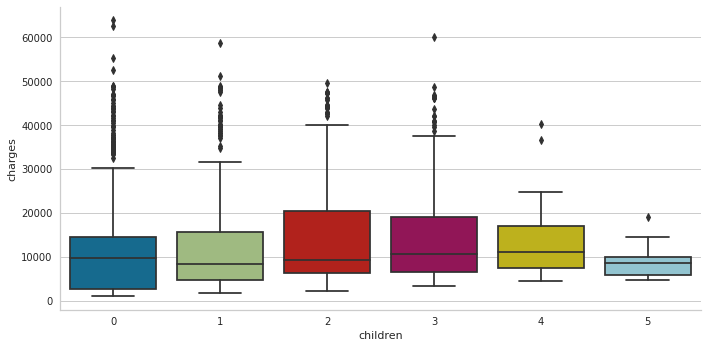

In [44]:
sns.catplot(x = "children", y = "charges", data = insurance_df, kind = "box", aspect = 2)

In [45]:
labels = ["too_weak", "normal", "heavy", "too_heavy"]
ranges = [0, 18.5, 24.9, 29.9, np.inf]
insurance_df["bmi"] = pd.cut(insurance_df["bmi"], bins = ranges, labels = labels)

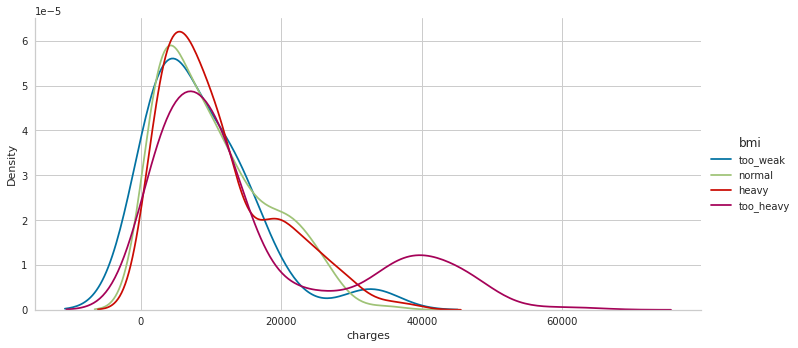

In [46]:
print(sns.FacetGrid(insurance_df, hue = "bmi", height = 5, aspect = 2).map(sns.kdeplot, "charges", shade = False).add_legend())

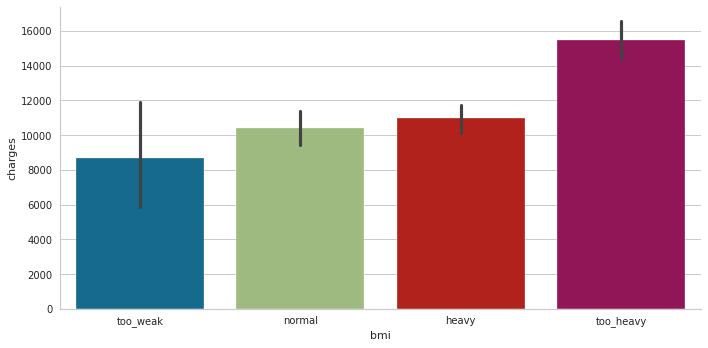

In [47]:
print(sns.catplot(x = "bmi", y = "charges", kind = "bar", data = insurance_df, aspect = 2))

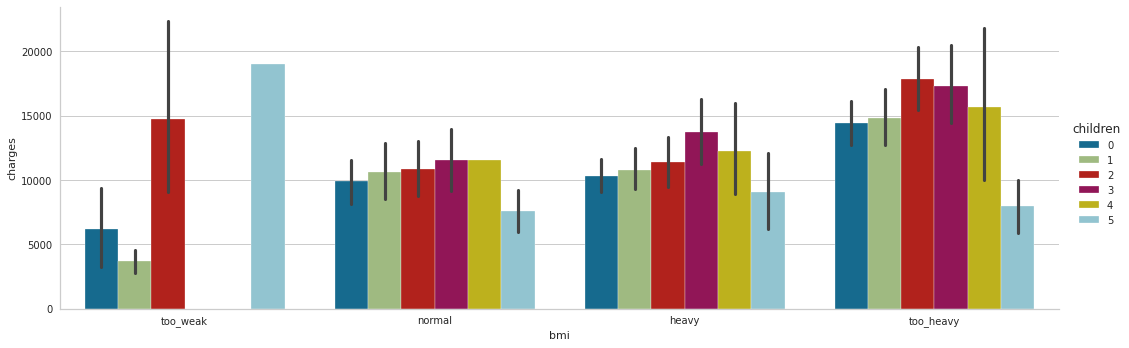

In [48]:
print(sns.catplot(x = "bmi", y = "charges", hue = "children", kind = "bar", data = insurance_df, aspect = 3))

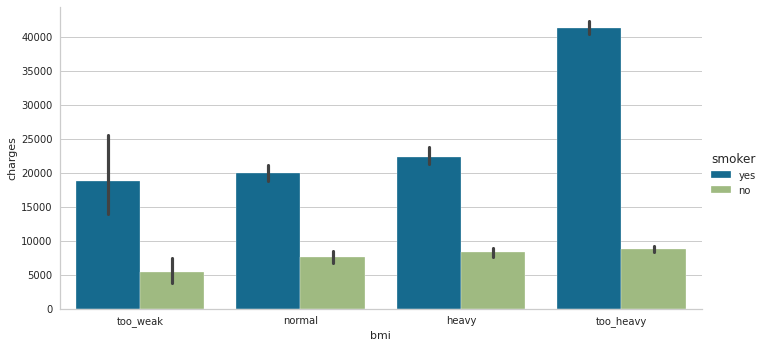

In [49]:
print(sns.catplot(x = "bmi", y = "charges", hue = "smoker", data = insurance_df, kind = "bar", aspect = 2))

<AxesSubplot:>

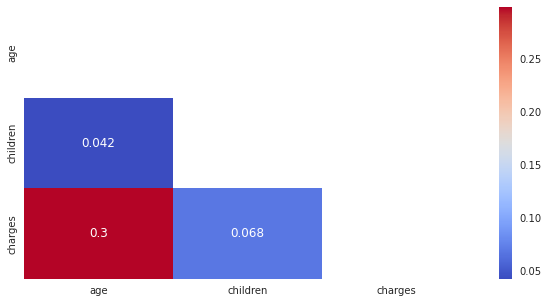

In [50]:
plt.rcParams.update({'font.size' : 12})
plt.figure(figsize = (10,5))
corr = insurance_df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr.abs(), annot = True, cmap = "coolwarm", mask = mask)

<AxesSubplot:xlabel='age'>

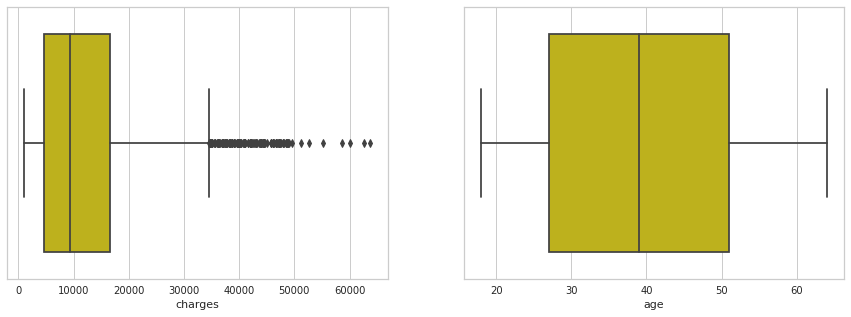

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(insurance_df["charges"],color="y")
plt.subplot(122)
sns.boxplot(insurance_df["age"],color="y")

In [52]:
pd.crosstab(insurance_df.age,insurance_df.children)[:10]

children,0,1,2,3,4,5
age,,,,,,
18,51,9,6,2,1,0
19,50,11,5,1,0,1
20,17,6,3,1,0,2
21,16,5,5,1,1,0
22,18,4,2,4,0,0
23,13,6,5,4,0,0
24,23,1,1,2,1,0
25,12,6,4,3,2,1
26,10,9,7,1,1,0


In [53]:
insurance_df[(insurance_df["age"]==18)&(insurance_df["sex"]=="female")&(insurance_df["children"]>0)]

,age,sex,bmi,children,smoker,region,charges
46,18,female,too_heavy,2,no,northeast,3393.35635
469,18,female,normal,1,no,southeast,2201.09710
564,18,female,too_heavy,2,no,southeast,2801.25880
571,18,female,too_heavy,1,no,southeast,2219.44510
1095,18,female,too_heavy,4,no,northeast,4561.18850
1204,18,female,heavy,3,yes,southeast,18223.45120


In [54]:
insurance_df[(insurance_df["age"]==18)&(insurance_df["sex"]=="male")&(insurance_df["children"]>0)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,too_heavy,1,no,southeast,1725.55230
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
270,18,male,heavy,1,no,southeast,1719.43630
369,18,male,too_heavy,3,no,northeast,3481.86800
710,18,male,too_heavy,1,no,southeast,1727.54000
938,18,male,heavy,2,no,southeast,2304.00220
1023,18,male,normal,1,no,southeast,1711.02680
1080,18,male,normal,2,no,southeast,11884.04858
1170,18,male,heavy,1,yes,northeast,17178.68240


In [55]:
clf=LocalOutlierFactor(n_neighbors=50)
clf.fit_predict(insurance_df[["age","children"]])

array([-1, -1,  1, ...,  1,  1,  1])

In [56]:
clf_scores=clf.negative_outlier_factor_

In [57]:
np.sort(clf_scores)[0:20]

array([-5.60000000e+09, -5.60000000e+09, -5.60000000e+09, -5.60000000e+09,
       -5.60000000e+09, -5.60000000e+09, -5.60000000e+09, -5.60000000e+09,
       -5.60000000e+09, -4.59669436e+09, -4.59669436e+09, -4.59669436e+09,
       -4.59669436e+09, -4.59669436e+09, -4.59669436e+09, -1.44867022e+09,
       -1.44867022e+09, -2.00000001e+08, -2.00000001e+08, -2.00000001e+08])

In [58]:
treshold=np.sort(clf_scores)[20]

In [59]:
insurance_df[clf_scores<treshold]

,age,sex,bmi,children,smoker,region,charges
1,18,male,too_heavy,1,no,southeast,1725.55230
46,18,female,too_heavy,2,no,northeast,3393.35635
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
270,18,male,heavy,1,no,southeast,1719.43630
369,18,male,too_heavy,3,no,northeast,3481.86800
469,18,female,normal,1,no,southeast,2201.09710
564,18,female,too_heavy,2,no,southeast,2801.25880
571,18,female,too_heavy,1,no,southeast,2219.44510
710,18,male,too_heavy,1,no,southeast,1727.54000


In [60]:
insurance_df[(insurance_df["age"] == 18) & (insurance_df["children"] > 1)]

,age,sex,bmi,children,smoker,region,charges
46,18,female,too_heavy,2,no,northeast,3393.35635
57,18,male,too_heavy,2,yes,southeast,34303.16720
250,18,male,too_weak,2,yes,northeast,12829.45510
369,18,male,too_heavy,3,no,northeast,3481.86800
564,18,female,too_heavy,2,no,southeast,2801.25880
938,18,male,heavy,2,no,southeast,2304.00220
1080,18,male,normal,2,no,southeast,11884.04858
1095,18,female,too_heavy,4,no,northeast,4561.18850
1204,18,female,heavy,3,yes,southeast,18223.45120


In [61]:
insurance_df.drop(insurance_df[(insurance_df["age"] == 18) & (insurance_df["children"] > 0)].index, inplace = True)

In [62]:
insurance_df.corr()

,age,children,charges
age,1.000000,0.054326,0.295261
children,0.054326,1.000000,0.070716
charges,0.295261,0.070716,1.000000


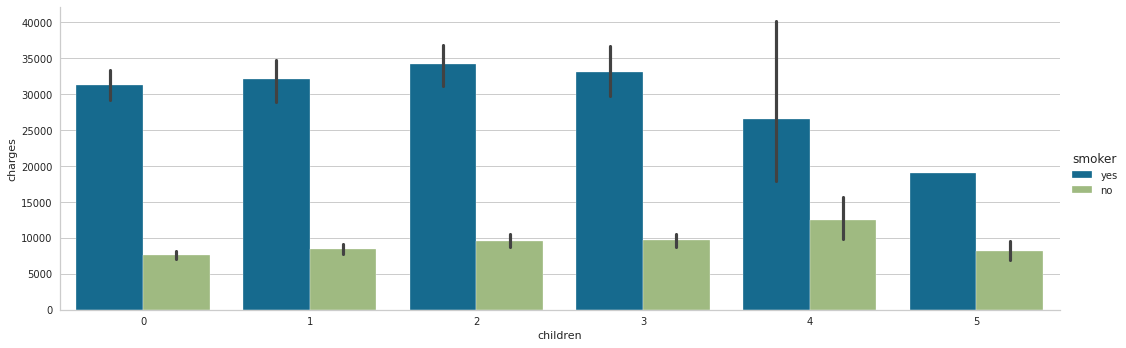

In [63]:
print(sns.catplot(x = "children", y = "charges", hue = "smoker", data = insurance_df, kind = "bar", aspect = 3))

In [64]:
insurance_df.shape

(1320, 7)

In [65]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,heavy,0,yes,southwest,16884.92400
2,28,male,too_heavy,3,no,southeast,4449.46200
3,33,male,normal,0,no,northwest,21984.47061
4,32,male,heavy,0,no,northwest,3866.85520
5,31,female,heavy,0,no,southeast,3756.62160


In [66]:
df_new = insurance_df.copy()
df_new = pd.get_dummies(data = insurance_df, columns = ["sex", "smoker"], drop_first = True)

In [67]:
df_new.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,heavy,0,southwest,16884.92400,0,1
2,28,too_heavy,3,southeast,4449.46200,1,0
3,33,normal,0,northwest,21984.47061,1,0
4,32,heavy,0,northwest,3866.85520,1,0
5,31,heavy,0,southeast,3756.62160,0,0


In [68]:
df_new = pd.get_dummies(data = df_new, columns = ["region", "bmi"])

In [69]:
df_new.head()

,age,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_too_weak,bmi_normal,bmi_heavy,bmi_too_heavy
0,19,0,16884.92400,0,1,0,0,0,1,0,0,1,0
2,28,3,4449.46200,1,0,0,0,1,0,0,0,0,1
3,33,0,21984.47061,1,0,0,1,0,0,0,1,0,0
4,32,0,3866.85520,1,0,0,1,0,0,0,0,1,0
5,31,0,3756.62160,0,0,0,0,1,0,0,0,1,0


In [70]:
df_new.charges = log(df_new.charges)

sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_new), columns = df_new.columns, index = df_new.index)

df_scaled.head()

,age,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_too_weak,bmi_normal,bmi_heavy,bmi_too_heavy
0,-1.472578,-0.900260,0.684392,-1.006079,1.972027,-0.563352,-0.571518,-0.603023,1.749725,-0.124035,-0.444772,1.587451,-1.073939
2,-0.825961,1.585814,-0.773628,0.993958,-0.507093,-0.563352,-0.571518,1.658312,-0.571518,-0.124035,-0.444772,-0.629941,0.931152
3,-0.466729,-0.900260,0.972921,0.993958,-0.507093,-0.563352,1.749725,-0.603023,-0.571518,-0.124035,2.248343,-0.629941,-1.073939
4,-0.538575,-0.900260,-0.927058,0.993958,-0.507093,-0.563352,1.749725,-0.603023,-0.571518,-0.124035,-0.444772,1.587451,-1.073939
5,-0.610422,-0.900260,-0.958677,-1.006079,-0.507093,-0.563352,-0.571518,1.658312,-0.571518,-0.124035,-0.444772,1.587451,-1.073939


In [71]:
X = df_scaled.drop("charges", axis = 1)
y = df_scaled["charges"]

**TRAIN TEST SPLIT**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1056, 12)
(264, 12)
(1056,)
(264,)


**OLS REGRESSION**

In [74]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              340.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   1.28e-320
Time:                        18:51:27   Log-Likelihood:                         -737.26
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1046   BIC:                                      1544.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5171      0.015     34.096      0.000       0.487       0.547
children             0.1413      0.015      9.237      0.000       0.111       0.171
sex_male            -0.0469      0.015     -3.100      0.002      -0.077      -0.017
smoker_yes           0.6690      0.015     44.603      0.000       0.640       0.698
region_northeast     0.0411      0.011      3.596      0.000       0.019       0.064
region_northwest     0.0102      0.011      0.897      0.370      -0.012       0.032
region_southeast    -0.0230      0.011     -2.018      0.044      -0.045      -0.001
region_southwest    -0.0274      0.011     -2.406      0.016      -0.050      -0.005
bmi_too_weak        -0.0282      0.015     -1.910      0.056      -0.057       0.001
bmi_normal          -0.0431      0.012     -3.618      0.000      -0.066      -0.020
bmi_heavy           -0.0163      0.010     -1.618      0.106      -0.036       0.003
bmi_too_heavy        0.0538      0.009      5.921      0.000       0.036       0.072
==============================================================================
Omnibus:                      366.610   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1277.443
Skew:                           1.680   Prob(JB):                    4.04e-278
Kurtosis:                       7.212   Cond. No.                     6.66e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

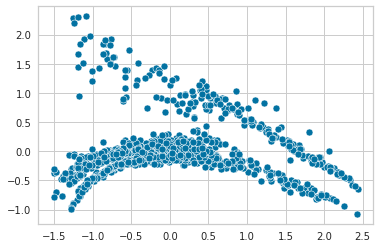

In [75]:
sns.scatterplot(model.fittedvalues, model.resid)

In [76]:
X = df_scaled.drop(["charges", "region_northwest"], axis = 1)
y = df_scaled["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              340.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   1.28e-320
Time:                        18:51:28   Log-Likelihood:                         -737.26
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1046   BIC:                                      1544.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5171      0.015     34.096      0.000       0.487       0.547
children             0.1413      0.015      9.237      0.000       0.111       0.171
sex_male            -0.0469      0.015     -3.100      0.002      -0.077      -0.017
smoker_yes           0.6690      0.015     44.603      0.000       0.640       0.698
region_northeast     0.0310      0.018      1.686      0.092      -0.005       0.067
region_southeast    -0.0334      0.019     -1.771      0.077      -0.070       0.004
region_southwest    -0.0376      0.018     -2.032      0.042      -0.074      -0.001
bmi_too_weak        -0.0282      0.015     -1.910      0.056      -0.057       0.001
bmi_normal          -0.0431      0.012     -3.618      0.000      -0.066      -0.020
bmi_heavy           -0.0163      0.010     -1.618      0.106      -0.036       0.003
bmi_too_heavy        0.0538      0.009      5.921      0.000       0.036       0.072
==============================================================================
Omnibus:                      366.610   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1277.443
Skew:                           1.680   Prob(JB):                    4.04e-278
Kurtosis:                       7.212   Cond. No.                     4.32e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

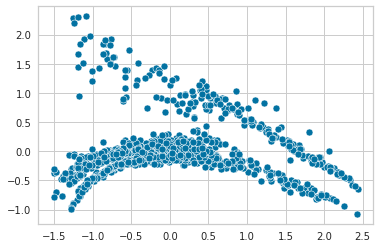

In [77]:
sns.scatterplot(model.fittedvalues, model.resid)

In [78]:
X = df_scaled.drop(["charges", "region_northwest", "bmi_heavy"], axis = 1)
y = df_scaled["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              340.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   1.28e-320
Time:                        18:51:29   Log-Likelihood:                         -737.26
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1046   BIC:                                      1544.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5171      0.015     34.096      0.000       0.487       0.547
children             0.1413      0.015      9.237      0.000       0.111       0.171
sex_male            -0.0469      0.015     -3.100      0.002      -0.077      -0.017
smoker_yes           0.6690      0.015     44.603      0.000       0.640       0.698
region_northeast     0.0310      0.018      1.686      0.092      -0.005       0.067
region_southeast    -0.0334      0.019     -1.771      0.077      -0.070       0.004
region_southwest    -0.0376      0.018     -2.032      0.042      -0.074      -0.001
bmi_too_weak        -0.0238      0.015     -1.545      0.123      -0.054       0.006
bmi_normal          -0.0296      0.017     -1.698      0.090      -0.064       0.005
bmi_too_heavy        0.0718      0.017      4.109      0.000       0.038       0.106
==============================================================================
Omnibus:                      366.610   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1277.443
Skew:                           1.680   Prob(JB):                    4.04e-278
Kurtosis:                       7.212   Cond. No.                         2.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

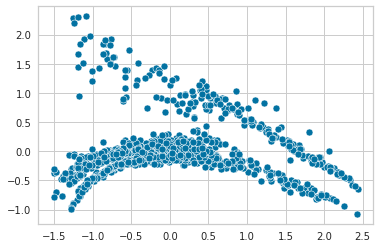

In [79]:
sns.scatterplot(model.fittedvalues, model.resid)

In [80]:
X=df_scaled.drop(["charges","region_northwest","bmi_heavy","bmi_too_weak"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              377.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   2.10e-321
Time:                        18:51:30   Log-Likelihood:                         -738.46
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1047   BIC:                                      1540.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5186      0.015     34.234      0.000       0.489       0.548
children             0.1418      0.015      9.268      0.000       0.112       0.172
sex_male            -0.0463      0.015     -3.059      0.002      -0.076      -0.017
smoker_yes           0.6690      0.015     44.575      0.000       0.640       0.698
region_northeast     0.0299      0.018      1.624      0.105      -0.006       0.066
region_southeast    -0.0323      0.019     -1.712      0.087      -0.069       0.005
region_southwest    -0.0370      0.018     -2.003      0.045      -0.073      -0.001
bmi_normal          -0.0259      0.017     -1.497      0.135      -0.060       0.008
bmi_too_heavy        0.0763      0.017      4.421      0.000       0.042       0.110
==============================================================================
Omnibus:                      368.568   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.808
Skew:                           1.688   Prob(JB):                    8.35e-281
Kurtosis:                       7.233   Cond. No.                         2.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
X=df_scaled.drop(["charges","region_northwest","bmi_heavy","bmi_too_weak","bmi_normal"],axis=1)
y=df_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              424.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   3.01e-322
Time:                        18:51:30   Log-Likelihood:                         -739.59
No. Observations:                1056   AIC:                                      1495.
Df Residuals:                    1048   BIC:                                      1535.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5197      0.015     34.334      0.000       0.490       0.549
children             0.1417      0.015      9.255      0.000       0.112       0.172
sex_male            -0.0460      0.015     -3.042      0.002      -0.076      -0.016
smoker_yes           0.6681      0.015     44.524      0.000       0.639       0.698
region_northeast     0.0287      0.018      1.559      0.119      -0.007       0.065
region_southeast    -0.0326      0.019     -1.728      0.084      -0.070       0.004
region_southwest    -0.0369      0.018     -1.995      0.046      -0.073      -0.001
bmi_too_heavy        0.0880      0.015      5.730      0.000       0.058       0.118
==============================================================================
Omnibus:                      363.644   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1250.373
Skew:                           1.671   Prob(JB):                    3.05e-272
Kurtosis:                       7.153   Cond. No.                         2.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

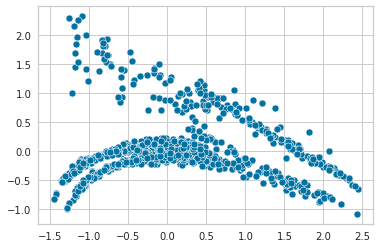

In [82]:
sns.scatterplot(model.fittedvalues, model.resid)

In [83]:
X = df_scaled.drop(["charges", "region_northwest", "bmi_heavy", "bmi_too_weak", "bmi_normal", "region_northeast"], axis = 1)
y = df_scaled["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              483.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   4.45e-323
Time:                        18:51:31   Log-Likelihood:                         -740.81
No. Observations:                1056   AIC:                                      1496.
Df Residuals:                    1049   BIC:                                      1530.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.5200      0.015     34.334      0.000       0.490       0.550
children             0.1408      0.015      9.200      0.000       0.111       0.171
sex_male            -0.0453      0.015     -2.994      0.003      -0.075      -0.016
smoker_yes           0.6687      0.015     44.539      0.000       0.639       0.698
region_southeast    -0.0472      0.016     -2.886      0.004      -0.079      -0.015
region_southwest    -0.0511      0.016     -3.176      0.002      -0.083      -0.020
bmi_too_heavy        0.0876      0.015      5.701      0.000       0.057       0.118
==============================================================================
Omnibus:                      361.530   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.485
Skew:                           1.664   Prob(JB):                    2.34e-268
Kurtosis:                       7.115   Cond. No.                         1.51
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
model.conf_int()

,0,1
age,0.490321,0.549763
children,0.110796,0.170874
sex_male,-0.075003,-0.015611
smoker_yes,0.639212,0.698130
region_southeast,-0.079359,-0.015126
region_southwest,-0.082726,-0.019540
bmi_too_heavy,0.057476,0.117803


In [85]:
model.params

age                 0.520042
children            0.140835
sex_male           -0.045307
smoker_yes          0.668671
region_southeast   -0.047242
region_southwest   -0.051133
bmi_too_heavy       0.087639
dtype: float64

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


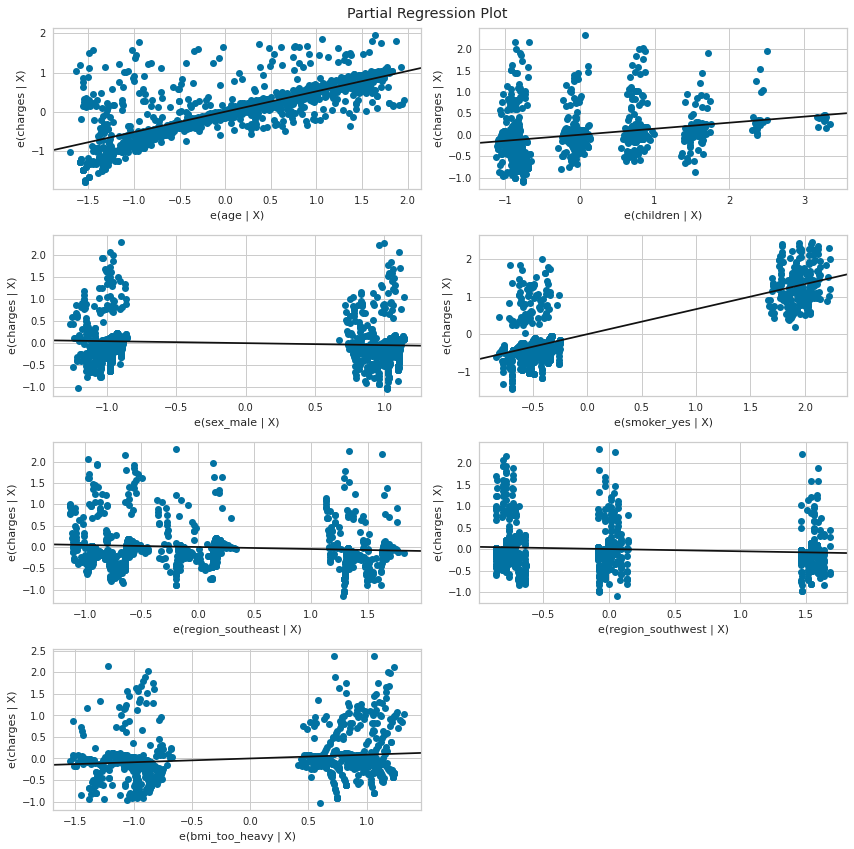

In [86]:
fig = plt.figure(figsize = (12,12))
fig = sm.graphics.plot_partregress_grid(model, fig = fig)
fig.tight_layout(pad = 1.0)

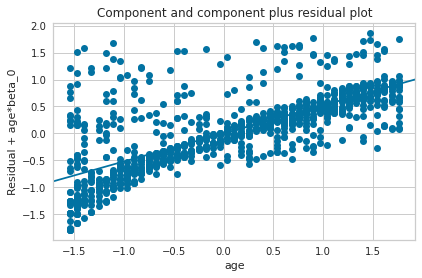

In [87]:
fig = sm.graphics.plot_ccpr(model, "age")
fig.tight_layout(pad = 1.0)

eval_env: 1


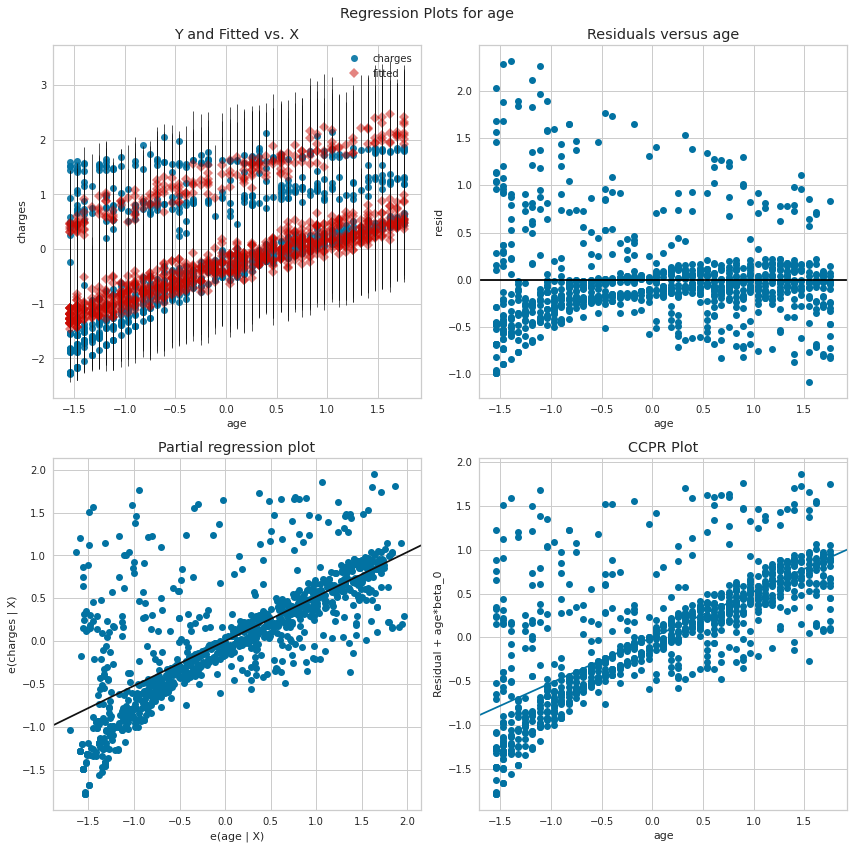

In [88]:
fig = plt.figure(figsize = (12,12))
fig = sm.graphics.plot_regress_exog(model, "age", fig = fig)
fig.tight_layout(pad = 1.0)

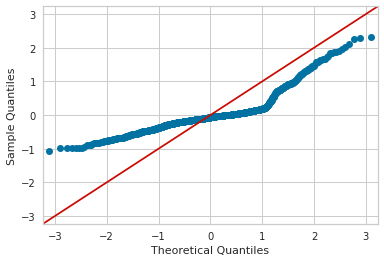

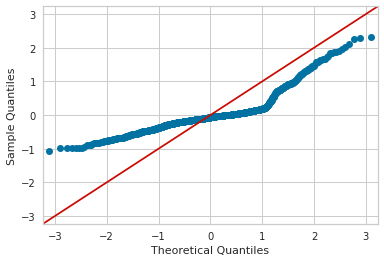

In [89]:
sm.qqplot(model.resid, line = "45")

In [90]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,age,1.013284
1,children,1.009044
2,sex_male,1.009078
3,smoker_yes,1.016660
4,region_southeast,1.173025
5,region_southwest,1.135877
6,bmi_too_heavy,1.041254


In [91]:
model = LinearRegression()
lin_mo = model.fit(X_train, y_train)
y_pred = lin_mo.predict(X_test)

In [92]:
lin_mo.score(X_train, y_train)

0.7633938657815397

In [93]:
lin_mo.score(X_test, y_test)

0.7780368839718872

In [94]:
r2_score(y_test, y_pred)

0.7780368839718872

<AxesSubplot:xlabel='charges', ylabel='Density'>

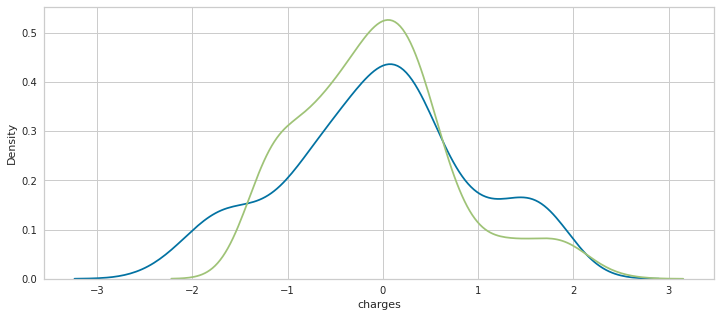

In [95]:
plt.figure(figsize = (12,5))
ax1 = sns.distplot(y_test, hist = False)
sns.distplot(y_pred, ax = ax1, hist = False)

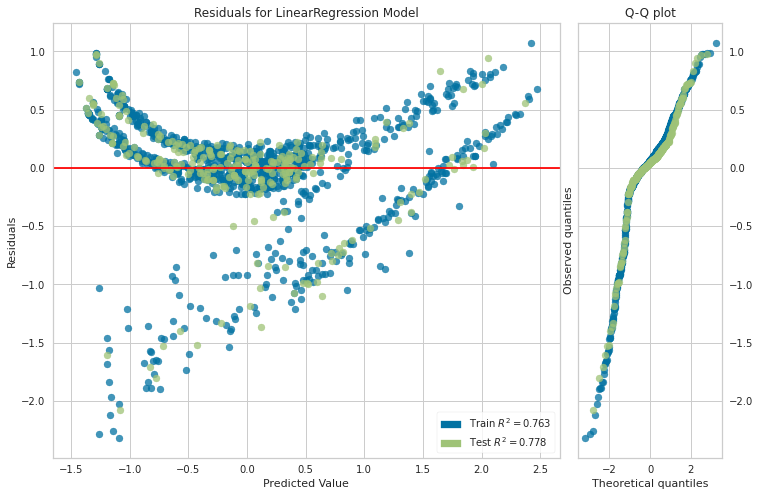

YellowbrickAttributeError: neither visualizer 'ResidualsPlot' nor wrapped estimator 'LinearRegression' have attribute 'line_color'

YellowbrickAttributeError: neither visualizer 'ResidualsPlot' nor wrapped estimator 'LinearRegression' have attribute 'line_color'

In [96]:
plt.figure(figsize = (12,8))
residuals_plot(model, X_train, y_train, X_test, y_test, line_color = "red", qqplot = True, hist = False)

According to this residual plot, the model is inappropriate for this data 

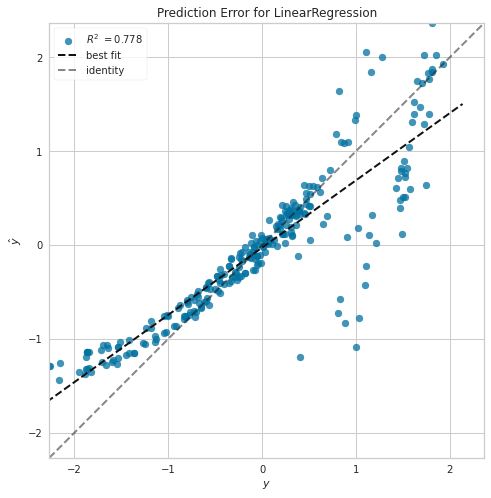

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=LinearRegression())

In [97]:
plt.figure(figsize = (12,8))
prediction_error(model, X_train, y_train, X_test, y_test)

In [98]:
model.coef_

array([ 0.52005067,  0.14083439, -0.04537606,  0.66872721, -0.04727003,
       -0.05115091,  0.08763724])

In [99]:
model.intercept_

-0.0030896103208219693